# Proyek Analisis Data: Bike Sharing
- **Nama:** Yeni Faturohmah
- **Email:** yenifaturohmahlearn@gmail.com
- **ID Dicoding:** MS033D5X0504

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah peminjaman sepeda berdasarkan waktu musiman?
- Bagaimana pola penggunaan sepeda berdasarkan hari dalam seminggu?
- Apakah jumlah peminjaman sepeda meningkat seiring dengan meningkatnya suhu?
- Kapan waktu puncak peminjaman sepeda dalam sehari?
- Apakah jumlah peminjaman sepeda meningkat pada akhir pekan dibandingkan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering data

In [169]:
day_df = pd.read_csv("day.csv")

In [170]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [171]:
hour_df = pd.read_csv("hour.csv")

In [172]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing data

#### Data day

In [173]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [174]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [175]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [176]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


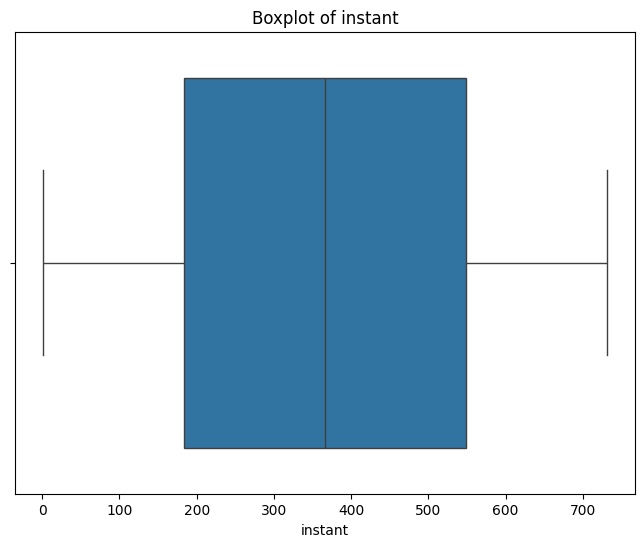

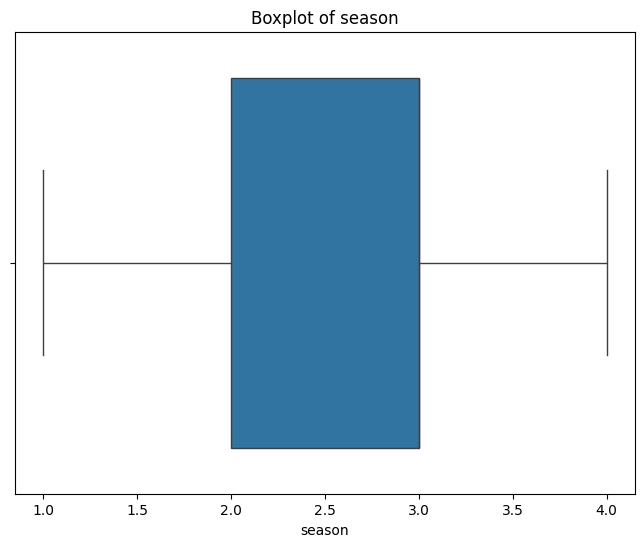

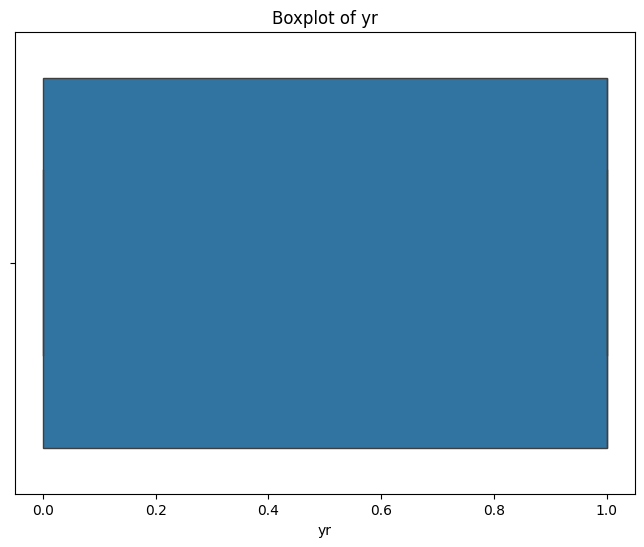

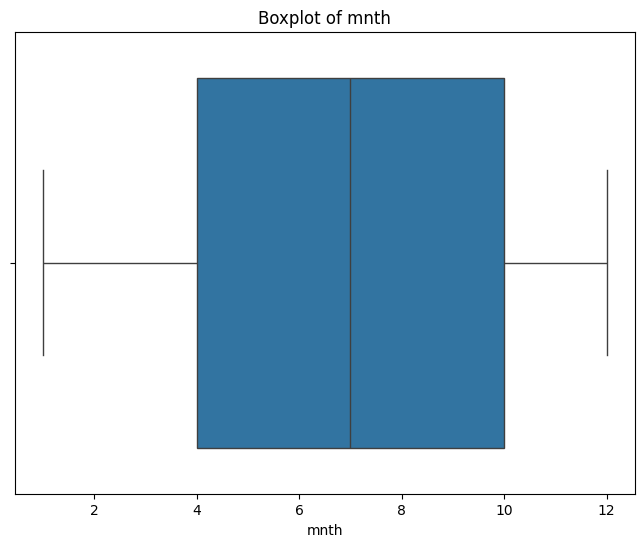

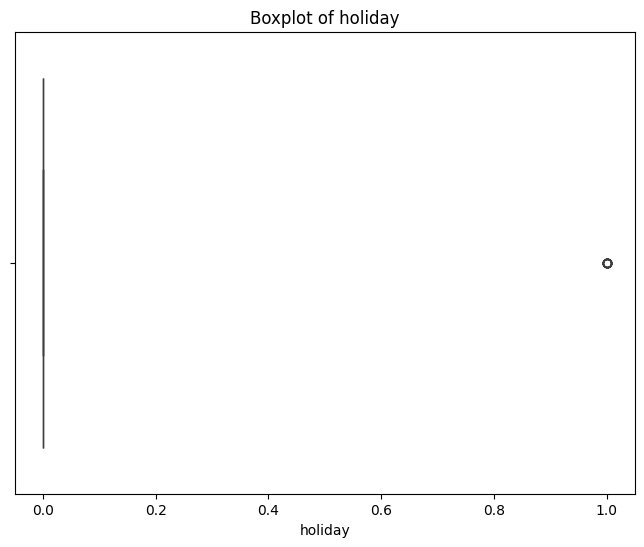

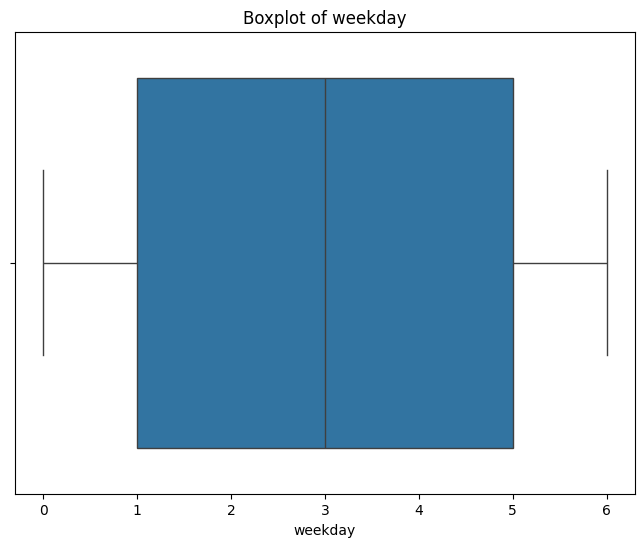

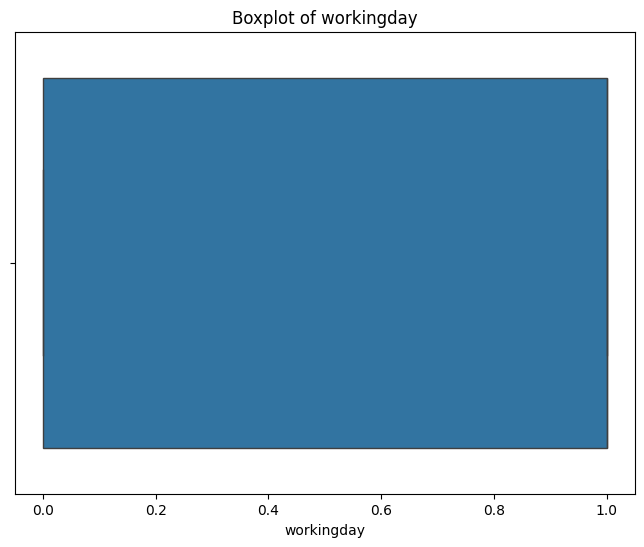

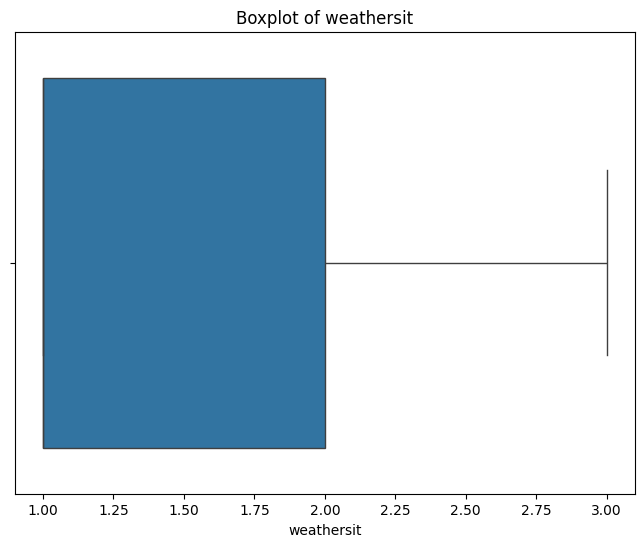

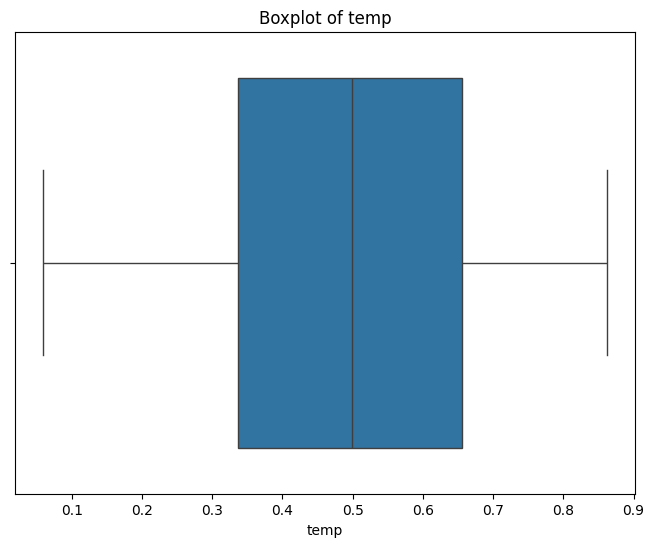

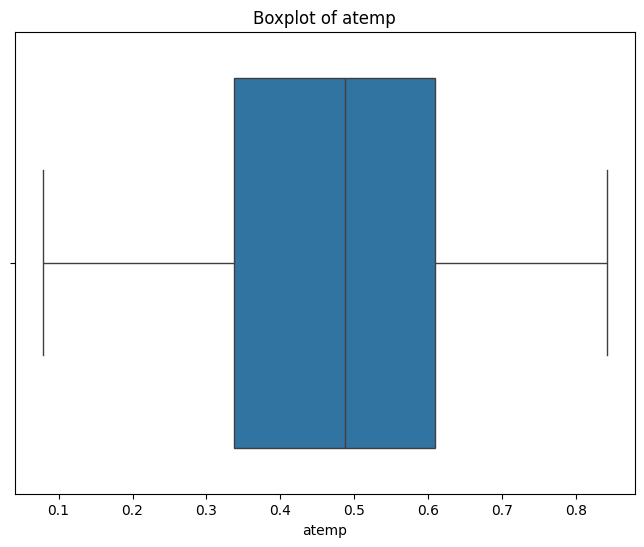

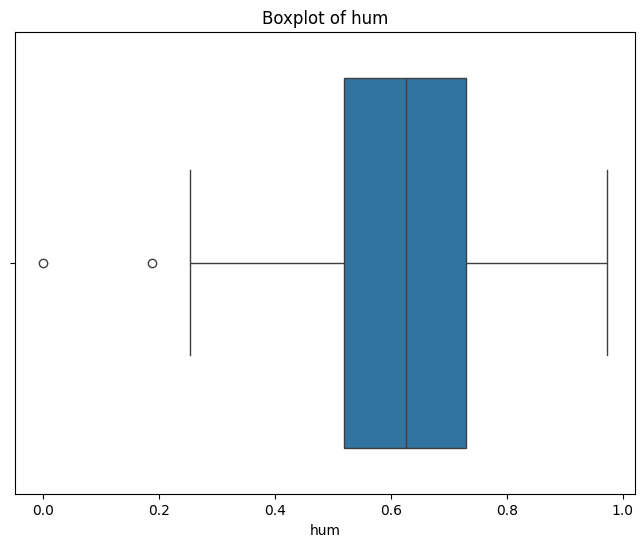

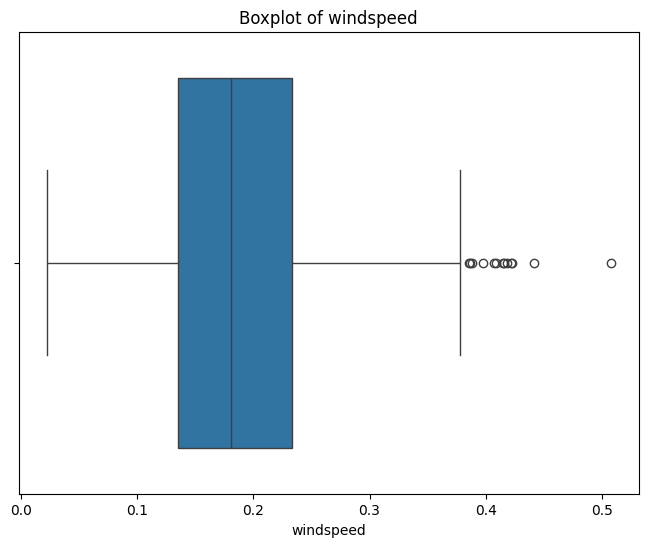

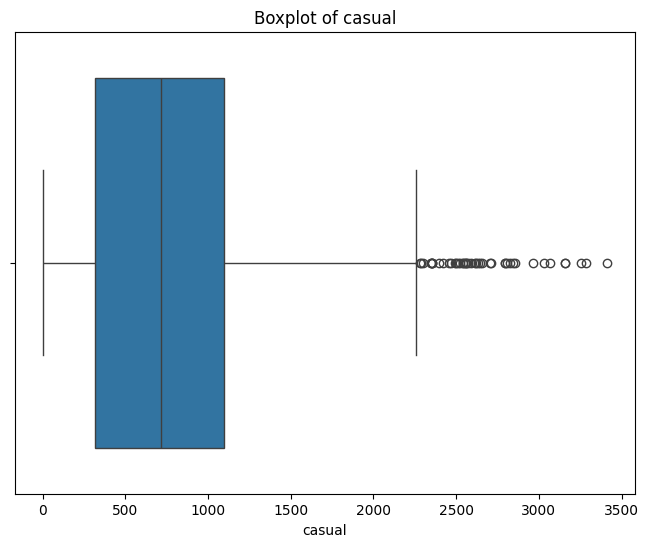

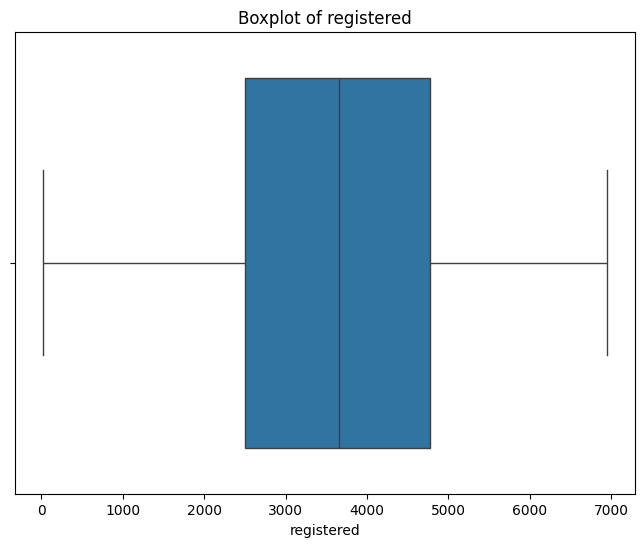

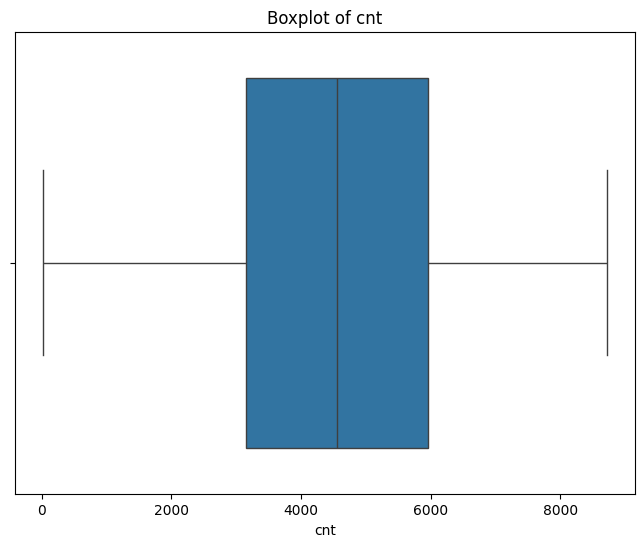

In [177]:
numerical_cols = day_df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=day_df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

#### Data hour

In [178]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [179]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [180]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


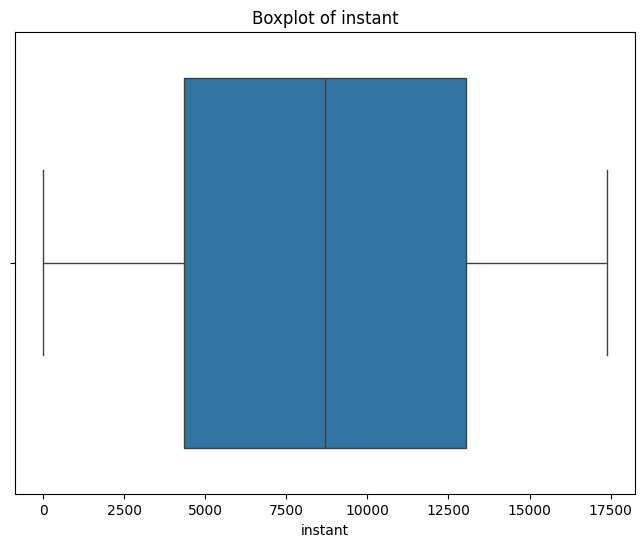

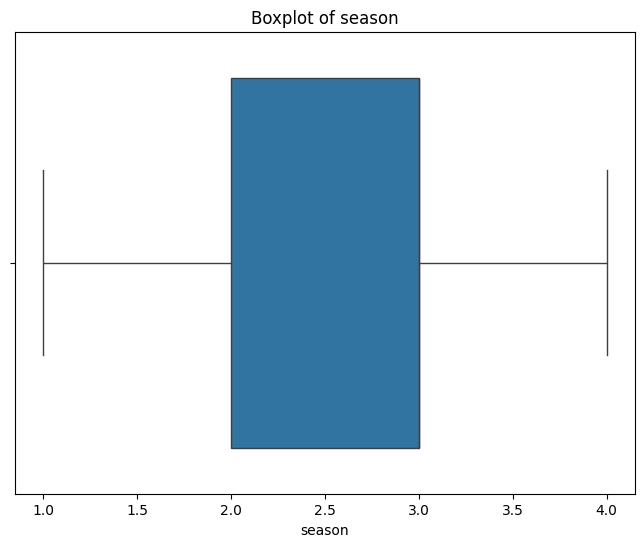

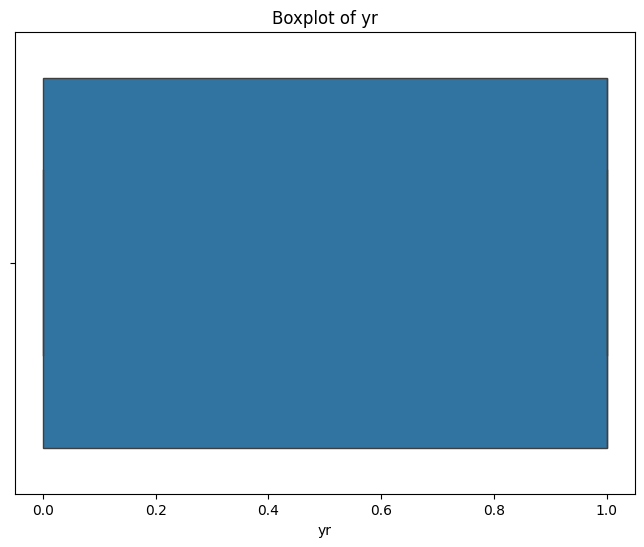

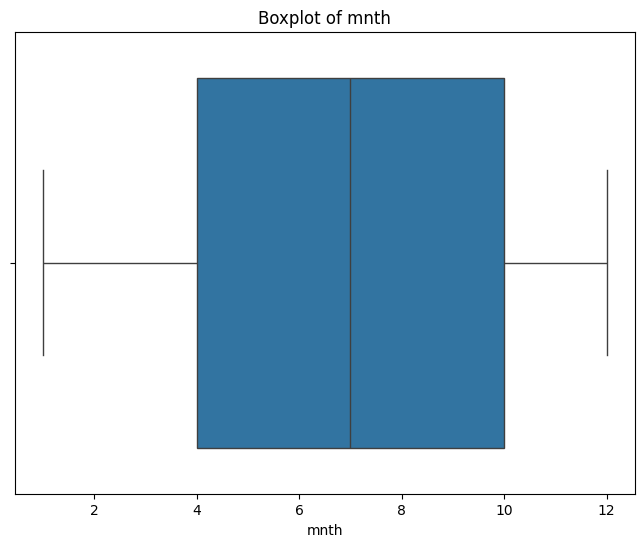

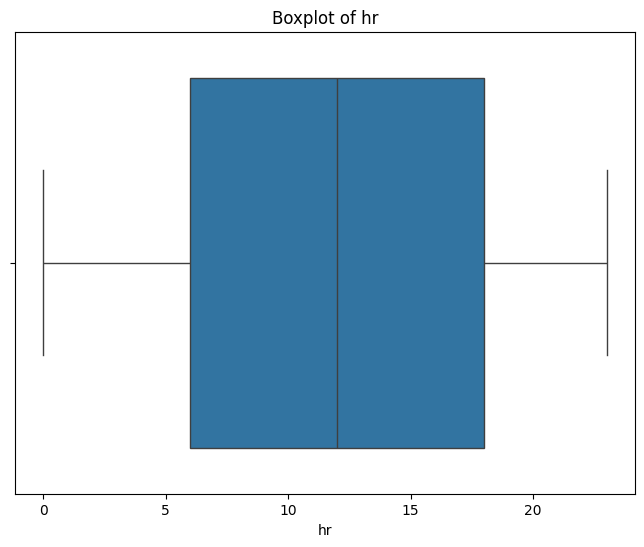

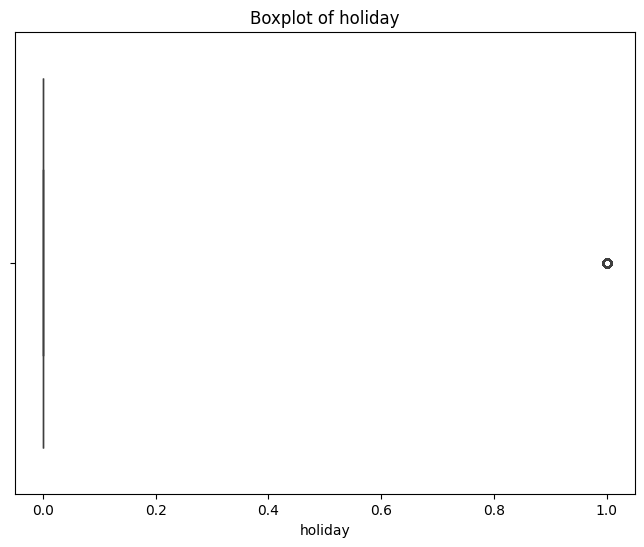

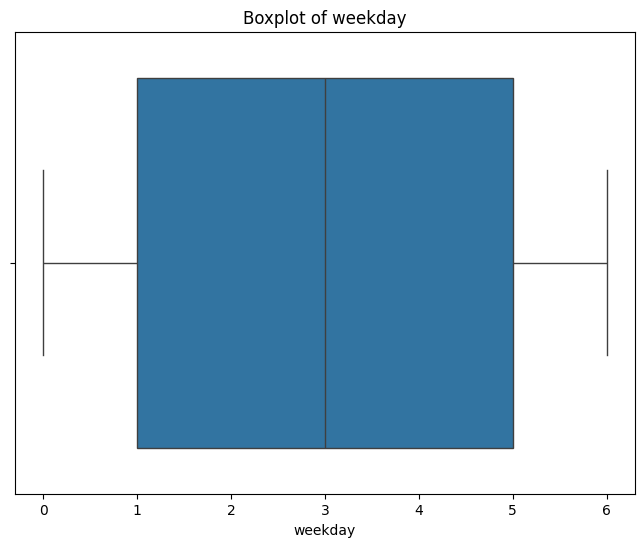

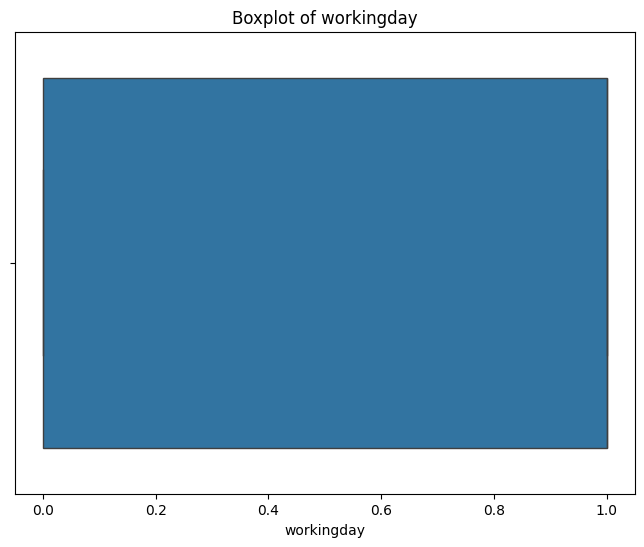

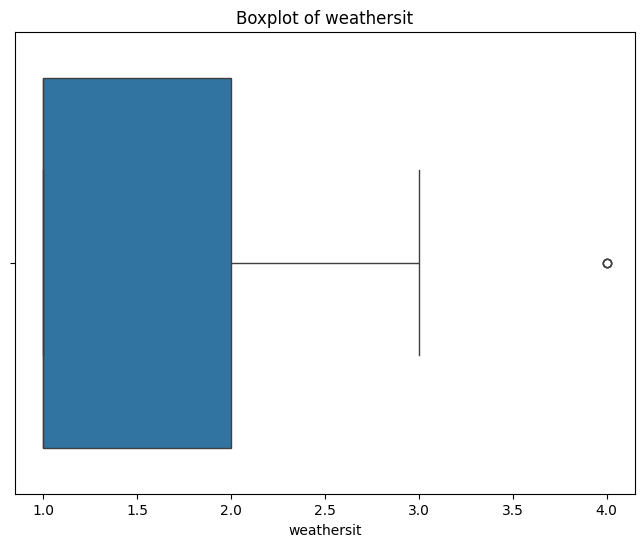

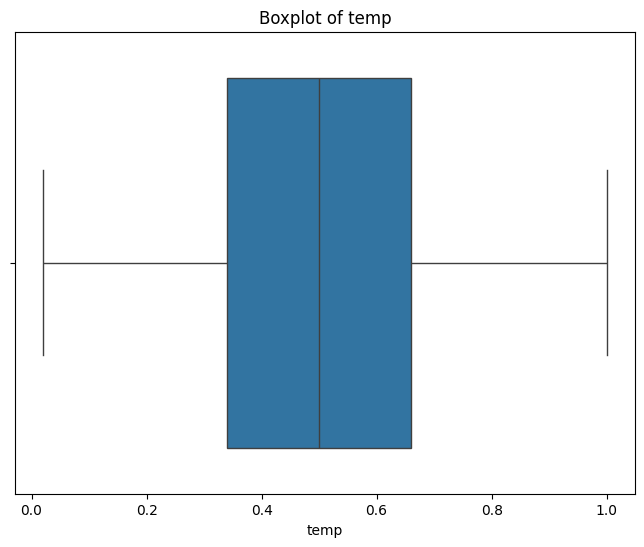

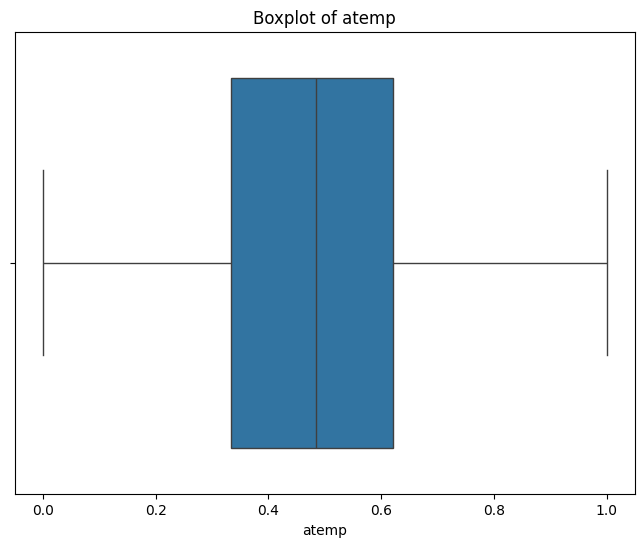

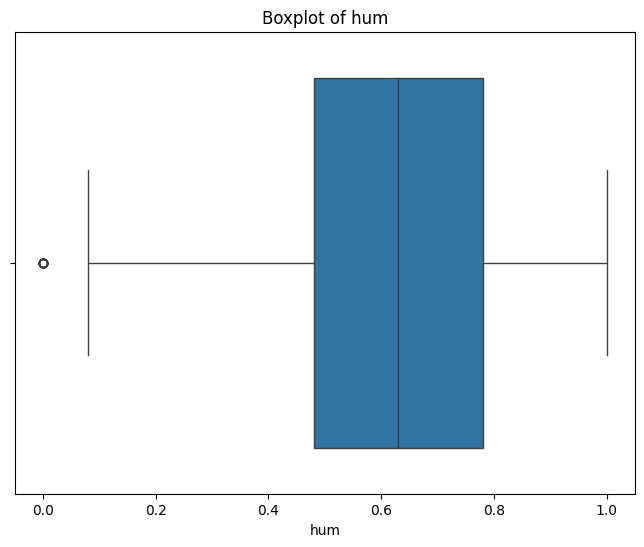

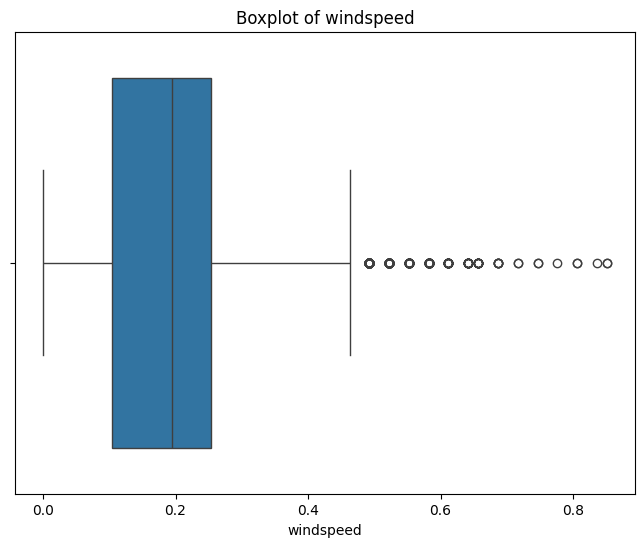

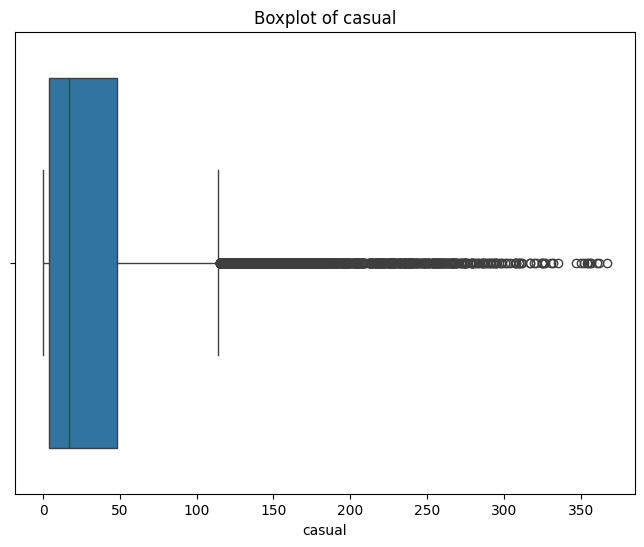

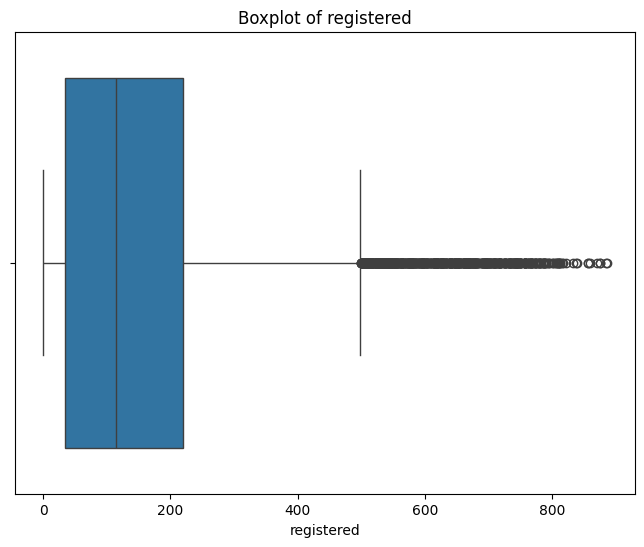

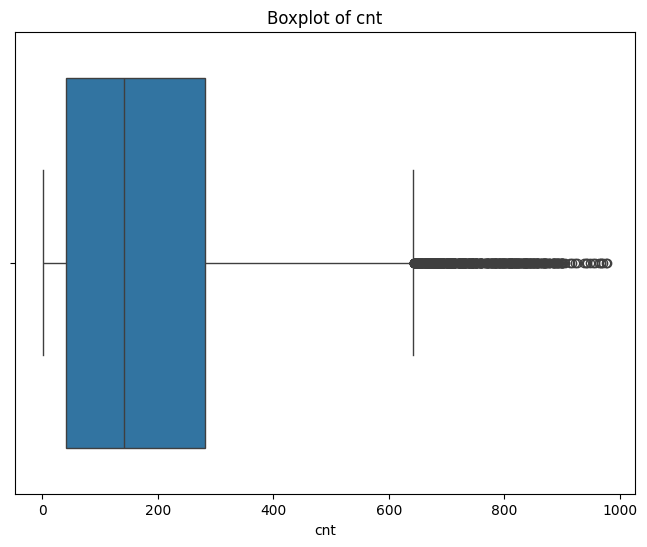

In [181]:
numerical_cols = hour_df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=hour_df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

### Cleaning Data

#### Data day

In [182]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [183]:
Q1 = day_df['holiday'].quantile(0.25)
Q3 = day_df['holiday'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
day_df = day_df[(day_df['holiday'] >= lower_bound) & (day_df['holiday'] <= upper_bound)]

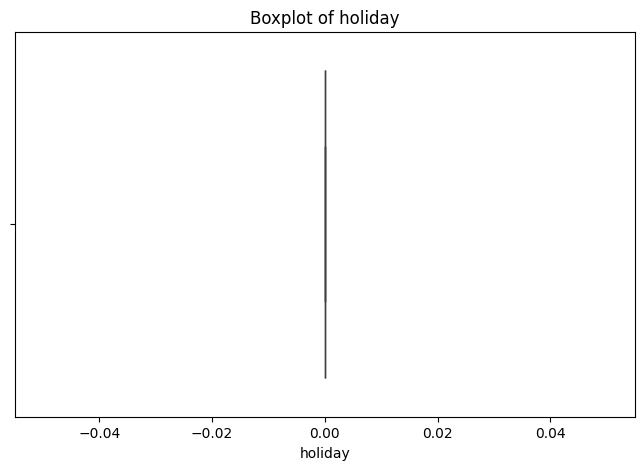

In [184]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['holiday'])
plt.title(f'Boxplot of holiday')
plt.show()

In [185]:
Q1 = day_df['hum'].quantile(0.25)
Q3 = day_df['hum'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
day_df = day_df[(day_df['hum'] >= lower_bound) & (day_df['hum'] <= upper_bound)]

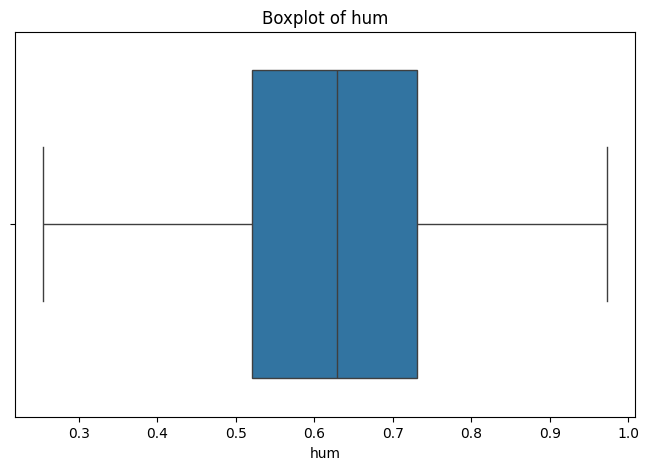

In [186]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['hum'])
plt.title(f'Boxplot of hum')
plt.show()

In [187]:
Q1 = day_df['windspeed'].quantile(0.25)
Q3 = day_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
day_df = day_df[(day_df['windspeed'] >= lower_bound) & (day_df['windspeed'] <= upper_bound)]

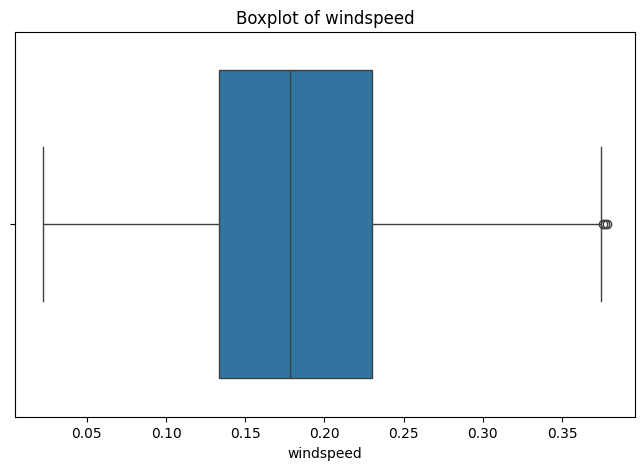

In [188]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['windspeed'])
plt.title(f'Boxplot of windspeed')
plt.show()

In [189]:
Q1 = day_df['windspeed'].quantile(0.25)
Q3 = day_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
day_df = day_df[(day_df['windspeed'] >= lower_bound) & (day_df['windspeed'] <= upper_bound)]

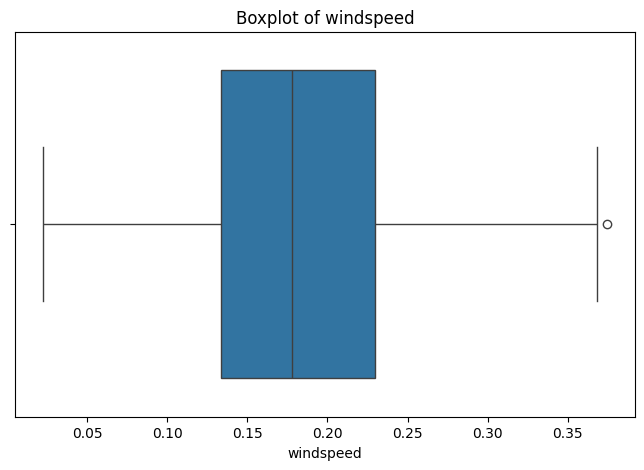

In [190]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['windspeed'])
plt.title(f'Boxplot of windspeed')
plt.show()

In [191]:
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
day_df = day_df[(day_df['casual'] >= lower_bound) & (day_df['casual'] <= upper_bound)]

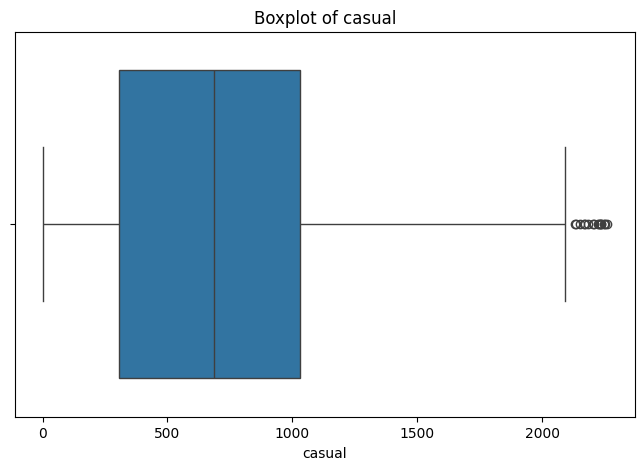

In [192]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['casual'])
plt.title(f'Boxplot of casual')
plt.show()

In [193]:
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
day_df = day_df[(day_df['casual'] >= lower_bound) & (day_df['casual'] <= upper_bound)]

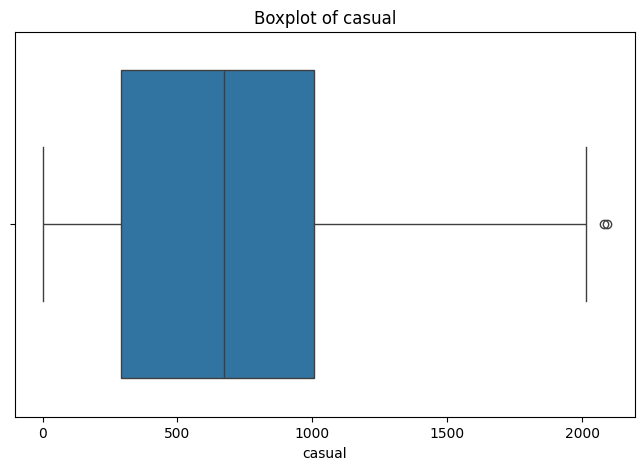

In [194]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['casual'])
plt.title(f'Boxplot of casual')
plt.show()

In [195]:
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
day_df = day_df[(day_df['casual'] >= lower_bound) & (day_df['casual'] <= upper_bound)]

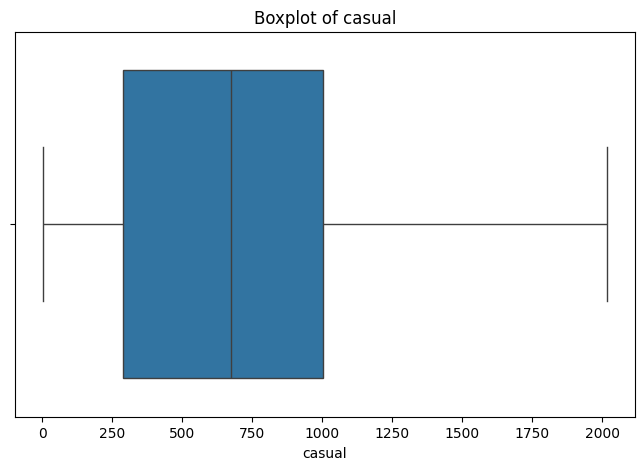

In [196]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['casual'])
plt.title(f'Boxplot of casual')
plt.show()

#### Data hour

In [197]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [198]:
Q1 = hour_df['holiday'].quantile(0.25)
Q3 = hour_df['holiday'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['holiday'] >= lower_bound) & (hour_df['holiday'] <= upper_bound)]

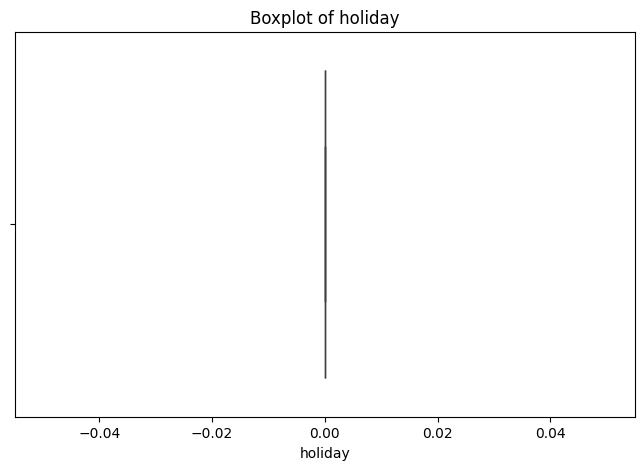

In [199]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=hour_df['holiday'])
plt.title(f'Boxplot of holiday')
plt.show()

In [200]:
Q1 = hour_df['weathersit'].quantile(0.25)
Q3 = hour_df['weathersit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['weathersit'] >= lower_bound) & (hour_df['weathersit'] <= upper_bound)]

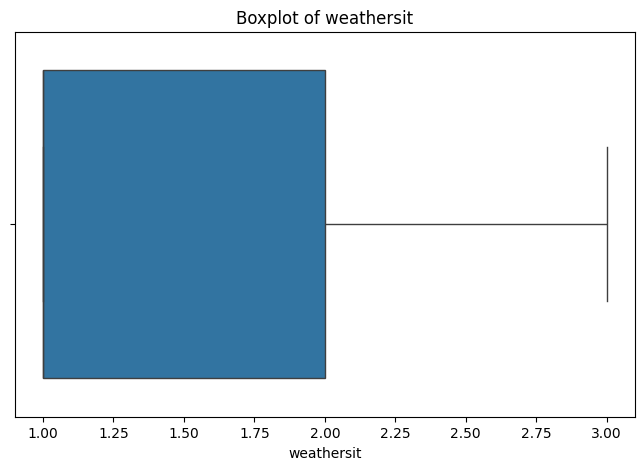

In [201]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=hour_df['weathersit'])
plt.title(f'Boxplot of weathersit')
plt.show()

In [202]:
Q1 = hour_df['hum'].quantile(0.25)
Q3 = hour_df['hum'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['hum'] >= lower_bound) & (hour_df['hum'] <= upper_bound)]

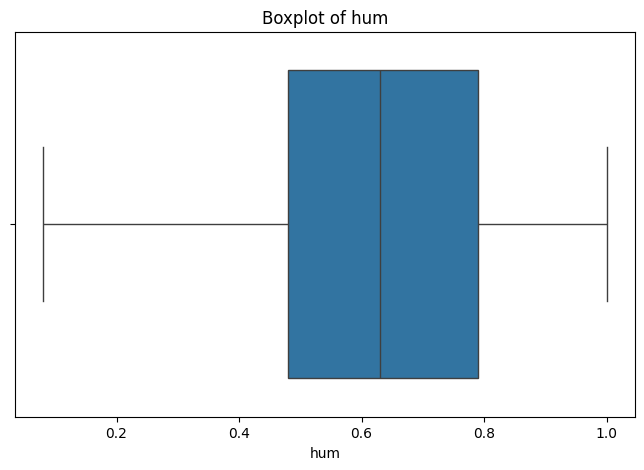

In [203]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=hour_df['hum'])
plt.title(f'Boxplot of hum')
plt.show()

In [204]:
Q1 = hour_df['windspeed'].quantile(0.25)
Q3 = hour_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['windspeed'] >= lower_bound) & (hour_df['windspeed'] <= upper_bound)]

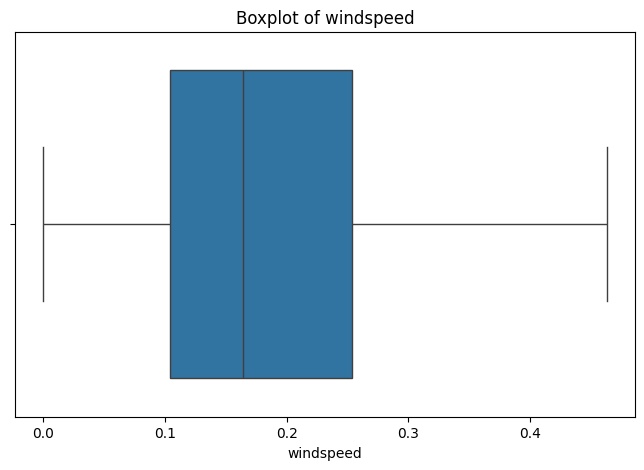

In [205]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=hour_df['windspeed'])
plt.title(f'Boxplot of windspeed')
plt.show()

In [206]:
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['casual'] >= lower_bound) & (hour_df['casual'] <= upper_bound)]

In [207]:
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['casual'] >= lower_bound) & (hour_df['casual'] <= upper_bound)]

In [208]:
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['casual'] >= lower_bound) & (hour_df['casual'] <= upper_bound)]

In [209]:
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['casual'] >= lower_bound) & (hour_df['casual'] <= upper_bound)]

In [210]:
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['casual'] >= lower_bound) & (hour_df['casual'] <= upper_bound)]

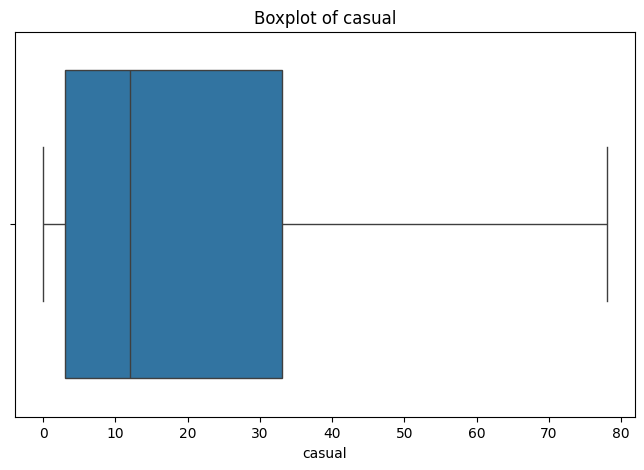

In [211]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=hour_df['casual'])
plt.title(f'Boxplot of casual')
plt.show()

In [212]:
Q1 = hour_df['registered'].quantile(0.25)
Q3 = hour_df['registered'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['registered'] >= lower_bound) & (hour_df['registered'] <= upper_bound)]

In [213]:
Q1 = hour_df['registered'].quantile(0.25)
Q3 = hour_df['registered'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['registered'] >= lower_bound) & (hour_df['registered'] <= upper_bound)]

In [214]:
Q1 = hour_df['registered'].quantile(0.25)
Q3 = hour_df['registered'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['registered'] >= lower_bound) & (hour_df['registered'] <= upper_bound)]

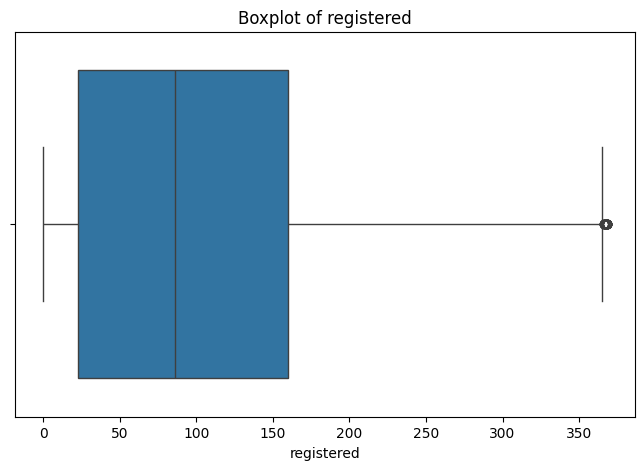

In [215]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=hour_df['registered'])
plt.title(f'Boxplot of registered')
plt.show()

In [216]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['cnt'] >= lower_bound) & (hour_df['cnt'] <= upper_bound)]

In [217]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['cnt'] >= lower_bound) & (hour_df['cnt'] <= upper_bound)]

In [218]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['cnt'] >= lower_bound) & (hour_df['cnt'] <= upper_bound)]

In [219]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['cnt'] >= lower_bound) & (hour_df['cnt'] <= upper_bound)]

In [220]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hour_df = hour_df[(hour_df['cnt'] >= lower_bound) & (hour_df['cnt'] <= upper_bound)]

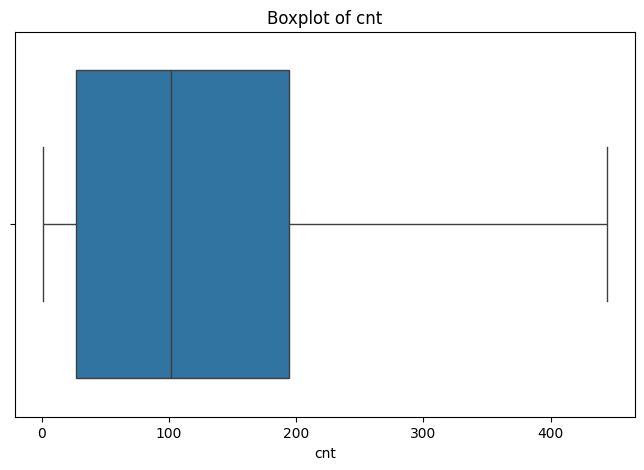

In [221]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=hour_df['cnt'])
plt.title(f'Boxplot of cnt')
plt.show()

#### Data Clean

In [222]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,634.000000,634,634.000000,634.000000,634.000000,634.0,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,352.758675,2011-12-18 18:12:29.526813952,2.496845,0.463722,6.526814,0.0,3.000000,0.771293,1.414826,0.489268,0.469117,0.634743,0.186410,698.369085,3655.867508,4354.236593
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.290000,0.022392,2.000000,20.000000,22.000000
25%,170.250000,2011-06-19 06:00:00,1.000000,0.000000,3.000000,0.0,1.000000,1.000000,1.000000,0.329167,0.326380,0.525580,0.134494,289.250000,2488.500000,3068.750000
50%,341.500000,2011-12-07 12:00:00,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.481667,0.470633,0.633125,0.178489,671.500000,3622.500000,4379.500000
75%,537.750000,2012-06-20 18:00:00,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653333,0.606542,0.735729,0.230724,1000.250000,4839.750000,5536.500000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,0.0,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.374383,2015.000000,6946.000000,8173.000000
std,211.847102,NaN,1.121733,0.499076,3.503112,0.0,1.885339,0.420332,0.553462,0.185873,0.165213,0.141081,0.071275,468.928451,1584.858758,1847.709590


In [223]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,13348.000000,13348,13348.000000,13348.000000,13348.000000,13348.000000,13348.0,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000
mean,8262.787609,2011-12-15 07:48:44.662870784,2.458046,0.461043,6.447708,10.802218,0.0,3.010264,0.735466,1.461118,0.468939,0.451842,0.655358,0.178084,18.824693,103.129383,121.954076
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,3890.750000,2011-06-15 18:00:00,1.000000,0.000000,3.000000,4.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.303000,0.510000,0.104500,3.000000,23.000000,27.000000
50%,8078.500000,2011-12-08 00:00:00,2.000000,0.000000,6.000000,10.000000,0.0,3.000000,1.000000,1.000000,0.460000,0.454500,0.660000,0.164200,10.000000,86.000000,101.500000
75%,12433.250000,2012-06-07 00:00:00,3.000000,1.000000,10.000000,17.000000,0.0,5.000000,1.000000,2.000000,0.620000,0.590900,0.820000,0.253700,30.000000,160.000000,194.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.000000,0.960000,1.000000,1.000000,0.462700,78.000000,368.000000,444.000000
std,5048.095280,NaN,1.137030,0.498499,3.567085,7.304505,0.0,1.948801,0.441101,0.658231,0.187450,0.168269,0.186909,0.111886,20.397988,89.514131,103.494106


In [224]:
day_df.to_csv("day_clean.csv", index=False)

In [225]:
hour_df.to_csv("hour_clean.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore

In [226]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,634.000000,634,634.000000,634.000000,634.000000,634.0,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,352.758675,2011-12-18 18:12:29.526813952,2.496845,0.463722,6.526814,0.0,3.000000,0.771293,1.414826,0.489268,0.469117,0.634743,0.186410,698.369085,3655.867508,4354.236593
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.290000,0.022392,2.000000,20.000000,22.000000
25%,170.250000,2011-06-19 06:00:00,1.000000,0.000000,3.000000,0.0,1.000000,1.000000,1.000000,0.329167,0.326380,0.525580,0.134494,289.250000,2488.500000,3068.750000
50%,341.500000,2011-12-07 12:00:00,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.481667,0.470633,0.633125,0.178489,671.500000,3622.500000,4379.500000
75%,537.750000,2012-06-20 18:00:00,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653333,0.606542,0.735729,0.230724,1000.250000,4839.750000,5536.500000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,0.0,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.374383,2015.000000,6946.000000,8173.000000
std,211.847102,NaN,1.121733,0.499076,3.503112,0.0,1.885339,0.420332,0.553462,0.185873,0.165213,0.141081,0.071275,468.928451,1584.858758,1847.709590


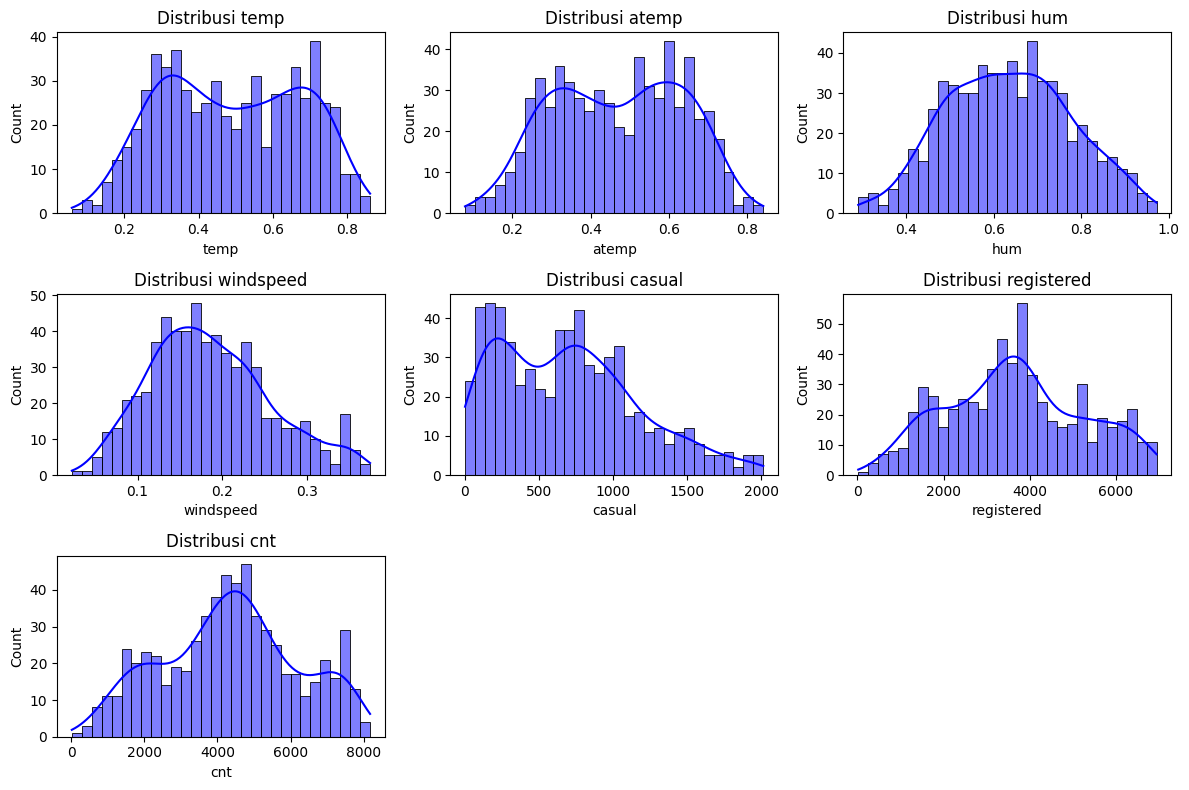

In [227]:
numeric_columns = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(day_df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

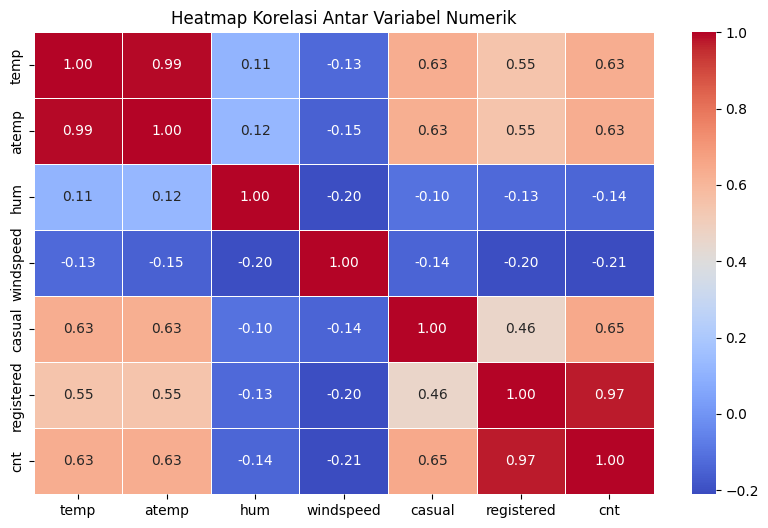

In [228]:
# Melihat korelasi antar variabel numerik dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(day_df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [229]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,13348.000000,13348,13348.000000,13348.000000,13348.000000,13348.000000,13348.0,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000,13348.000000
mean,8262.787609,2011-12-15 07:48:44.662870784,2.458046,0.461043,6.447708,10.802218,0.0,3.010264,0.735466,1.461118,0.468939,0.451842,0.655358,0.178084,18.824693,103.129383,121.954076
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,3890.750000,2011-06-15 18:00:00,1.000000,0.000000,3.000000,4.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.303000,0.510000,0.104500,3.000000,23.000000,27.000000
50%,8078.500000,2011-12-08 00:00:00,2.000000,0.000000,6.000000,10.000000,0.0,3.000000,1.000000,1.000000,0.460000,0.454500,0.660000,0.164200,10.000000,86.000000,101.500000
75%,12433.250000,2012-06-07 00:00:00,3.000000,1.000000,10.000000,17.000000,0.0,5.000000,1.000000,2.000000,0.620000,0.590900,0.820000,0.253700,30.000000,160.000000,194.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.000000,0.960000,1.000000,1.000000,0.462700,78.000000,368.000000,444.000000
std,5048.095280,NaN,1.137030,0.498499,3.567085,7.304505,0.0,1.948801,0.441101,0.658231,0.187450,0.168269,0.186909,0.111886,20.397988,89.514131,103.494106


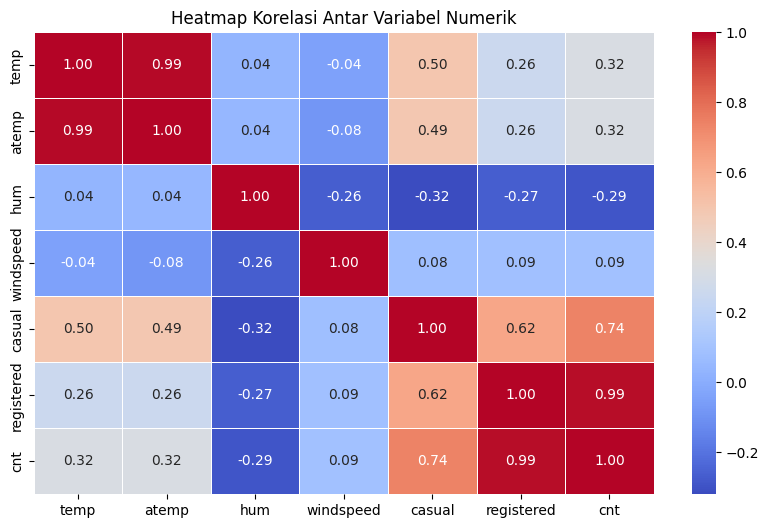

In [230]:
# Melihat korelasi antar variabel numerik dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hour_df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

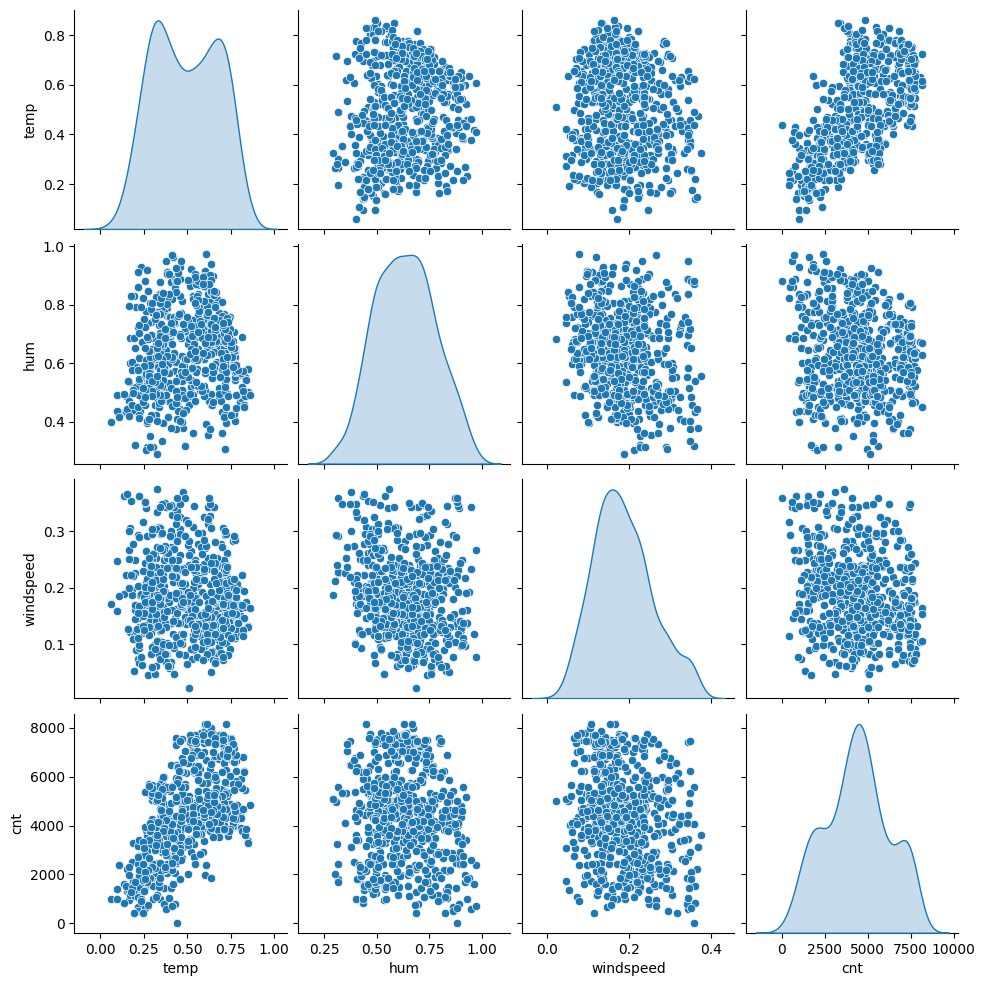

In [231]:
sns.pairplot(day_df[['temp', 'hum', 'windspeed', 'cnt']], diag_kind='kde')
plt.show()

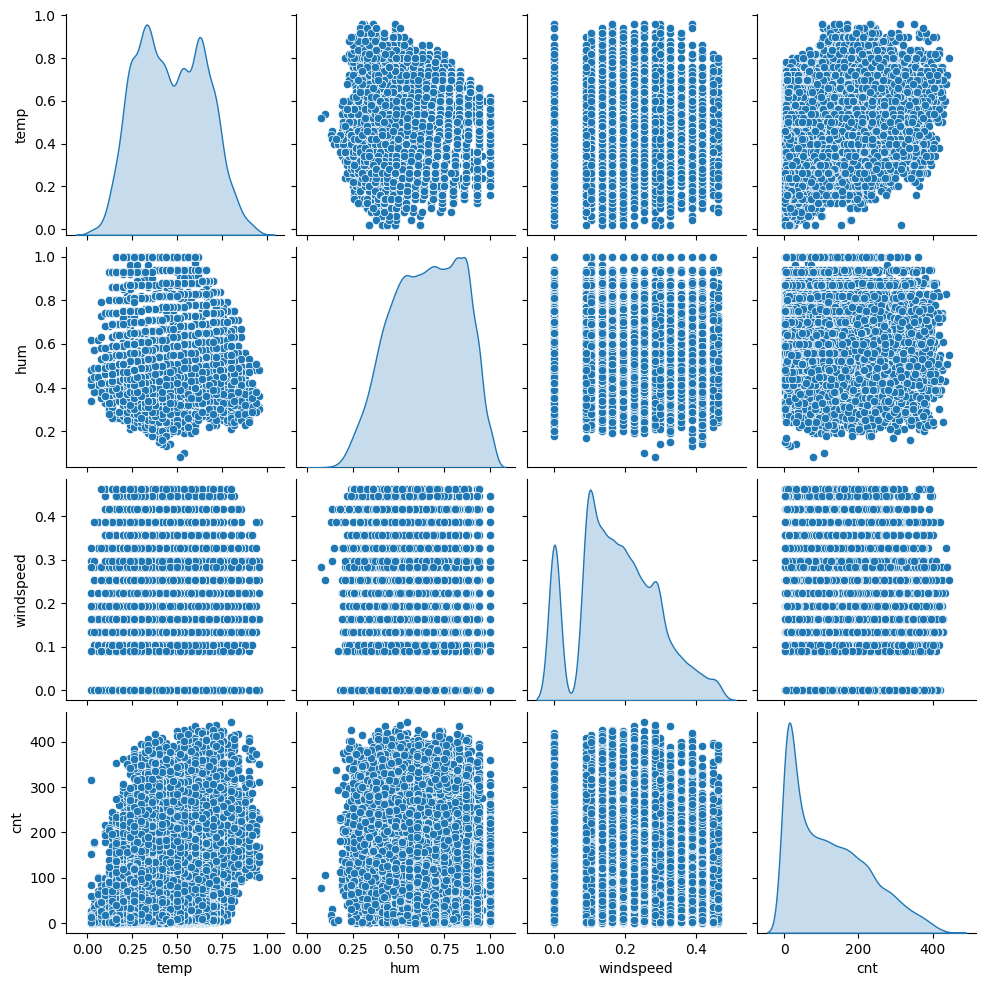

In [232]:
sns.pairplot(hour_df[['temp', 'hum', 'windspeed', 'cnt']], diag_kind='kde')
plt.show()

In [233]:
# Agregasi jumlah peminjaman berdasarkan musim
season_trend = day_df.groupby("season")["cnt"].agg(["mean", "median", "sum"]).reset_index()

# Agregasi jumlah peminjaman berdasarkan hari dalam seminggu
weekday_trend = day_df.groupby("weekday")["cnt"].agg(["mean", "median", "sum"]).reset_index()

# Agregasi jumlah peminjaman berdasarkan suhu (menggunakan binning suhu)
day_df["temp_bin"] = pd.cut(day_df["temp"], bins=5)
temp_trend = day_df.groupby("temp_bin")["cnt"].agg(["mean", "median", "sum"]).reset_index()

# Agregasi jumlah peminjaman berdasarkan jam dalam sehari (menggunakan data per jam)
hourly_trend = hour_df.groupby("hr")["cnt"].agg(["mean", "median", "sum"]).reset_index()

# Agregasi jumlah peminjaman berdasarkan hari kerja vs akhir pekan
weekend_trend = day_df.groupby("weekday")["cnt"].agg(["mean", "median", "sum"]).reset_index()

# Menampilkan hasil agregasi
season_trend, weekday_trend, temp_trend, hourly_trend, weekend_trend

<ipython-input-233-34a61261d7a4>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_trend = day_df.groupby("temp_bin")["cnt"].agg(["mean", "median", "sum"]).reset_index()


(   season         mean  median     sum
 0       1  2586.932099  2222.5  419083
 1       2  4722.572368  4715.5  717831
 2       3  5536.141104  5202.0  902391
 3       4  4594.146497  4486.0  721281,
    weekday         mean  median     sum
 0        0  3462.697368  3515.0  263165
 1        1  4428.873563  4362.0  385312
 2        2  4571.578431  4596.0  466301
 3        3  4532.049020  4642.5  462269
 4        4  4760.353535  4790.0  471275
 5        5  4698.494949  4661.0  465151
 6        6  3581.347826  4036.0  247113,
          temp_bin         mean  median     sum
 0  (0.0583, 0.22]  1568.325000  1475.5   62733
 1    (0.22, 0.38]  3217.337017  3249.0  582338
 2   (0.38, 0.541]  4398.118056  4372.5  633329
 3  (0.541, 0.701]  5464.352201  5119.0  868832
 4  (0.701, 0.862]  5575.945455  5319.0  613354,
     hr        mean  median     sum
 0    0   53.967143    40.0   37777
 1    1   33.420977    20.0   23261
 2    2   22.870451    11.0   15712
 3    3   11.788376     6.0    7910
 

<ipython-input-234-28d3820e9d28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_trend, x="season", y="mean", palette="coolwarm")


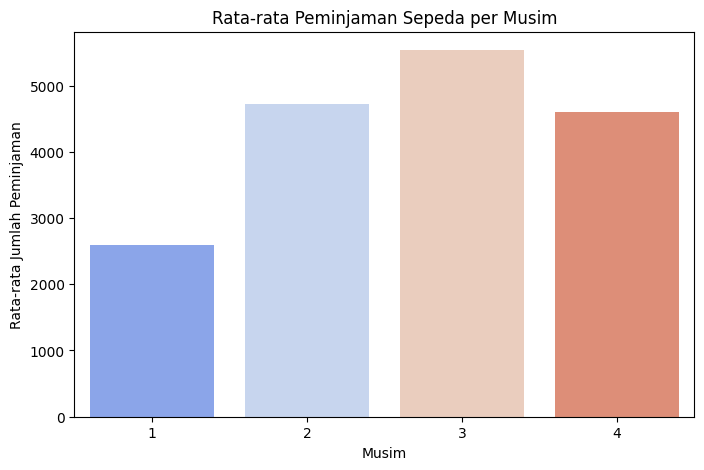

In [234]:
# Visualisasi jumlah peminjaman berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(data=season_trend, x="season", y="mean", palette="coolwarm")
plt.title("Rata-rata Peminjaman Sepeda per Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.xlabel("Musim")
plt.show()

<ipython-input-235-27b7f0f0985e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_trend, x="weekday", y="mean", palette="viridis")


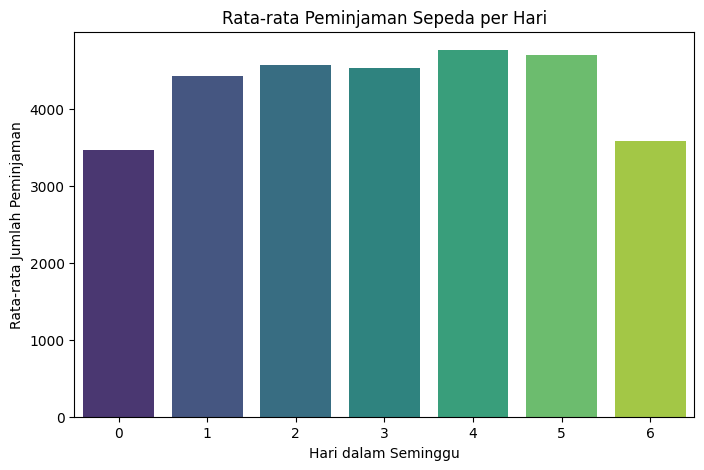

In [235]:
# Visualisasi jumlah peminjaman berdasarkan hari dalam seminggu
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_trend, x="weekday", y="mean", palette="viridis")
plt.title("Rata-rata Peminjaman Sepeda per Hari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.xlabel("Hari dalam Seminggu")
plt.show()

<ipython-input-236-89cdac1146bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_trend, x="temp_bin", y="mean", palette="magma")


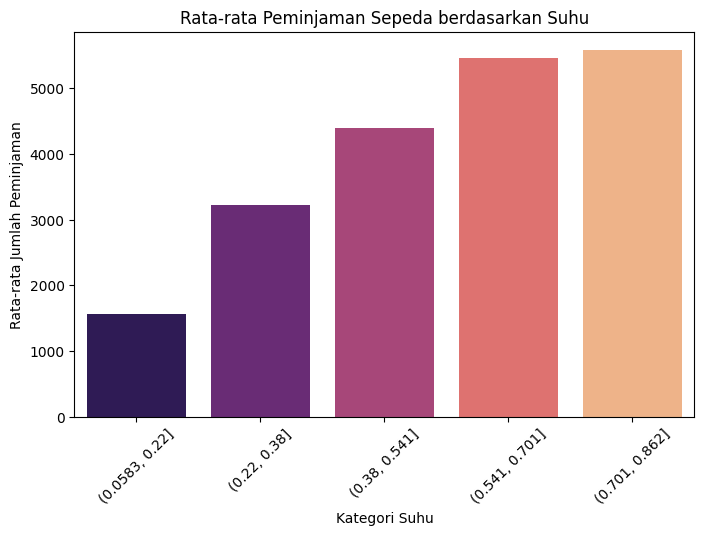

In [236]:
# Visualisasi jumlah peminjaman berdasarkan suhu
plt.figure(figsize=(8, 5))
sns.barplot(data=temp_trend, x="temp_bin", y="mean", palette="magma")
plt.title("Rata-rata Peminjaman Sepeda berdasarkan Suhu")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.xlabel("Kategori Suhu")
plt.xticks(rotation=45)
plt.show()

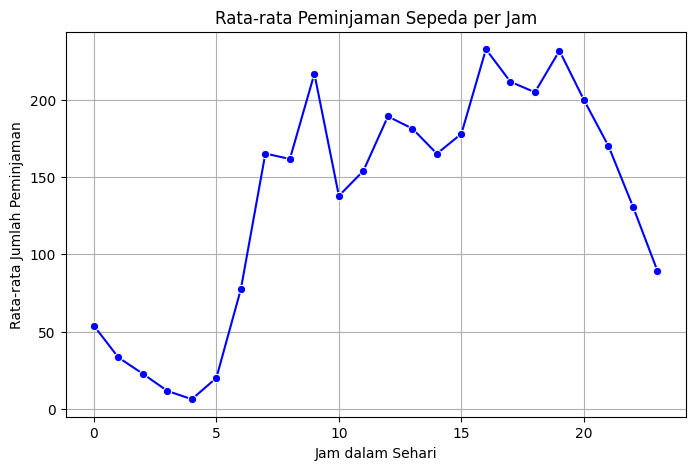

In [237]:
# Visualisasi peminjaman sepeda berdasarkan waktu dalam sehari
plt.figure(figsize=(8, 5))
sns.lineplot(data=hourly_trend, x="hr", y="mean", marker="o", color="blue")
plt.title("Rata-rata Peminjaman Sepeda per Jam")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.xlabel("Jam dalam Sehari")
plt.grid(True)
plt.show()

<ipython-input-238-c3d3be25f991>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekend_trend, x="weekday", y="mean", palette="Set2")


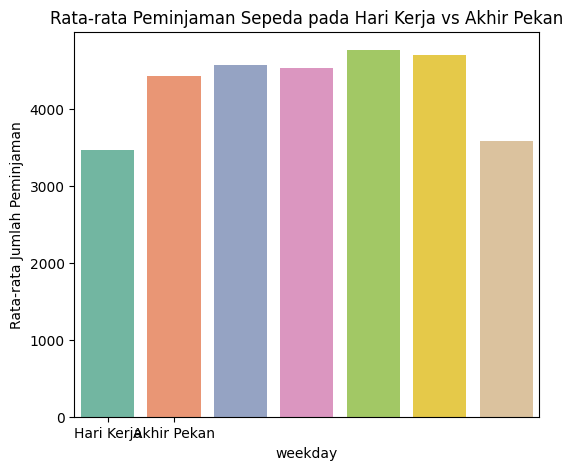

In [238]:
# Visualisasi perbedaan peminjaman antara hari kerja dan akhir pekan
plt.figure(figsize=(6, 5))
sns.barplot(data=weekend_trend, x="weekday", y="mean", palette="Set2")
plt.title("Rata-rata Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.xticks(ticks=[0, 1], labels=["Hari Kerja", "Akhir Pekan"])
plt.show()

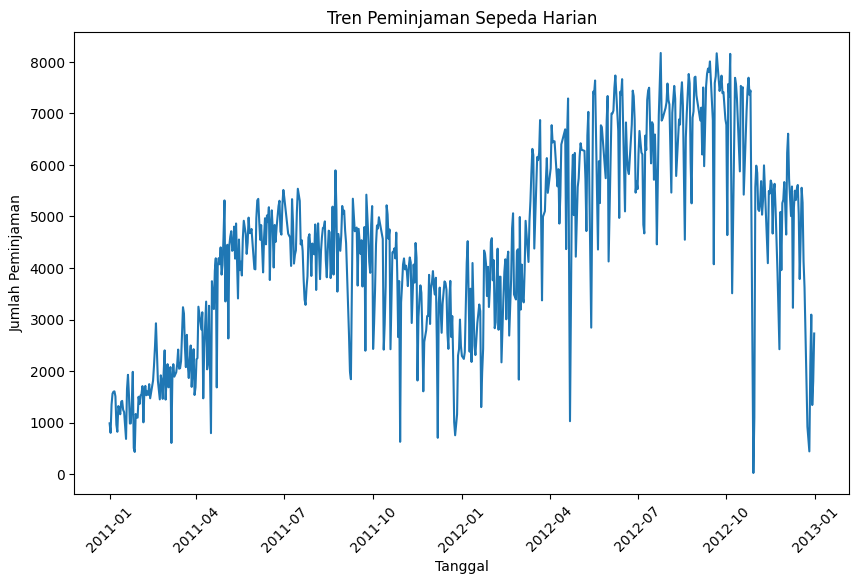

In [239]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="dteday", y="cnt", data=day_df)
plt.title("Tren Peminjaman Sepeda Harian")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana tren jumlah peminjaman sepeda berdasarkan waktu musiman?

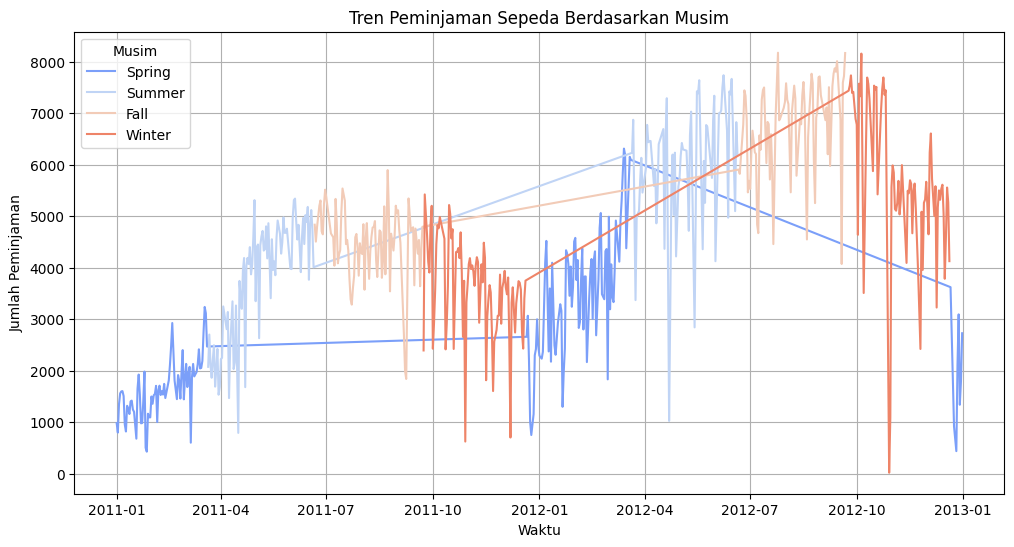

In [240]:
# Memetakan nilai musim ke label
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season_label"] = day_df["season"].map(season_map)

# Agregat total penyewaan berdasarkan musim
season_trend = day_df.groupby("season_label")["cnt"].sum().reset_index()

# Mengurutkan musim berdasarkan urutan yang telah ditentukan
season_order = ["Spring", "Summer", "Fall", "Winter"]
season_trend = season_trend.set_index("season_label").loc[season_order].reset_index()

# Agregat total penyewaan per musim dari waktu ke waktu
day_df["dteday"] = pd.to_datetime(day_df["dteday"])  # Convert date column to datetime

# Tren plot untuk setiap musim dari waktu ke waktu
plt.figure(figsize=(12, 6))
sns.lineplot(x="dteday", y="cnt", hue="season_label", data=day_df, palette="coolwarm")

plt.title("Tren Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Musim")
plt.grid(True)
plt.show()

### Pertanyaan 2 : Bagaimana pola penggunaan sepeda berdasarkan hari dalam seminggu?

<ipython-input-241-cf7822cb2b6f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday_label", y="cnt", data=weekday_trend, palette="viridis")


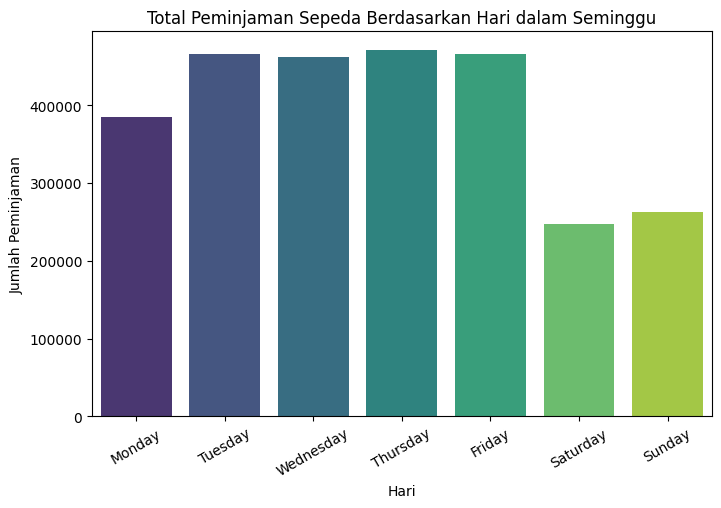

,weekday_label,cnt
0,Monday,385312
1,Tuesday,466301
2,Wednesday,462269
3,Thursday,471275
4,Friday,465151
5,Saturday,247113
6,Sunday,263165


In [241]:
# Memetakan nilai hari kerja ke label
weekday_map = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}
day_df["weekday_label"] = day_df["weekday"].map(weekday_map)

# Agregat total penyewaan berdasarkan hari kerja
weekday_trend = day_df.groupby("weekday_label")["cnt"].sum().reset_index()

# Urutkan hari kerja secara berurutan (Senin hingga Minggu)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_trend = weekday_trend.set_index("weekday_label").loc[weekday_order].reset_index()

# Plot tren
plt.figure(figsize=(8, 5))
sns.barplot(x="weekday_label", y="cnt", data=weekday_trend, palette="viridis")
plt.title("Total Peminjaman Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=30)
plt.show()

# Menampilkan ringkasan data
weekday_trend

### Pertanyaan 3 : Apakah jumlah peminjaman sepeda meningkat seiring dengan meningkatnya suhu?

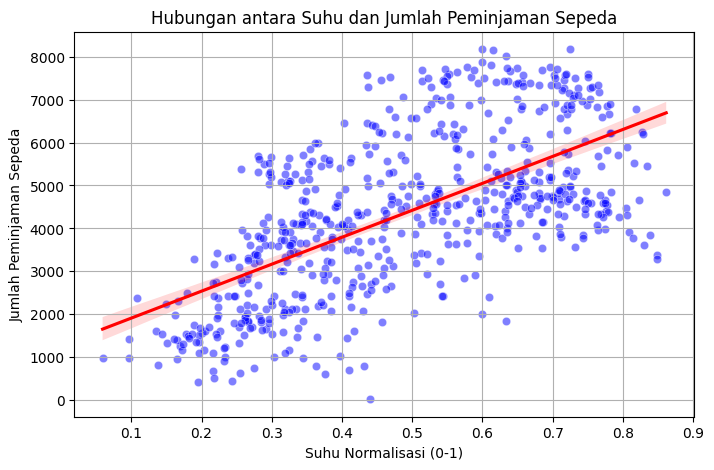

0.6313781392716511

In [242]:
# Scatter plot antara suhu dan jumlah peminjaman sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(x="temp", y="cnt", data=day_df, alpha=0.5, color="blue")

# Menambahkan regresi untuk melihat tren hubungan
sns.regplot(x="temp", y="cnt", data=day_df, scatter=False, color="red")

plt.title("Hubungan antara Suhu dan Jumlah Peminjaman Sepeda")
plt.xlabel("Suhu Normalisasi (0-1)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.grid(True)
plt.show()

# Menghitung korelasi antara suhu dan jumlah peminjaman
correlation = day_df["temp"].corr(day_df["cnt"])
correlation

### Pertanyaan 4 : Kapan waktu puncak peminjaman sepeda dalam sehari?

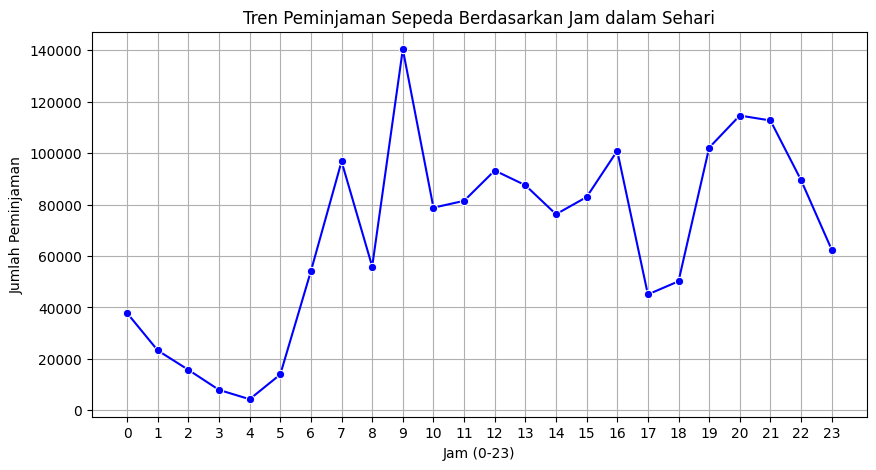

,9
hr,9
cnt,140422


In [243]:
# Memetakan nilai jam ke label
hour_df["hr_label"] = hour_df["hr"].astype(str) + ":00"  # Menjadikan label waktu dalam format jam

# Agregat total penyewaan per jam
hourly_trend = hour_df.groupby("hr")["cnt"].sum().reset_index()

# Plot tren pinjaman sepeda per jam
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=hourly_trend, marker="o", color="blue")

plt.title("Tren Peminjaman Sepeda Berdasarkan Jam dalam Sehari")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(ticks=range(0, 24, 1))  # Menampilkan setiap jam
plt.grid(True)
plt.show()

# Menampilkan jam dengan peminjaman tertinggi
peak_hour = hourly_trend.loc[hourly_trend["cnt"].idxmax()]
peak_hour

### Pertanyaan 5 : Apakah jumlah peminjaman sepeda meningkat pada akhir pekan dibandingkan hari kerja?

<ipython-input-244-cae3d8163dd7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_weekend", y="cnt", data=weekend_vs_weekday, palette="coolwarm")


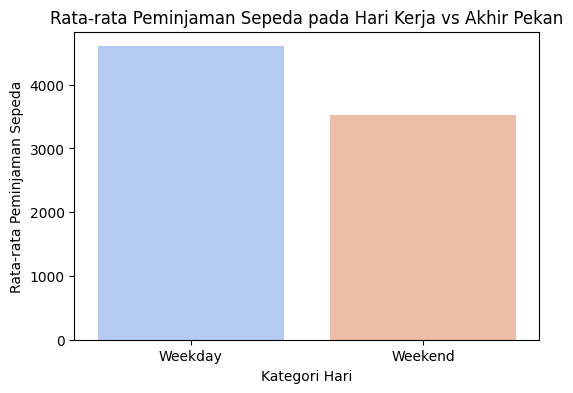

,is_weekend,cnt
0,Weekday,4601.856851
1,Weekend,3519.158621


In [244]:
# Menandai apakah hari termasuk akhir pekan atau hari kerja
day_df["is_weekend"] = day_df["weekday"].isin([0, 6])  # 0: Sunday, 6: Saturday

# Menghitung rata-rata peminjaman sepeda pada hari kerja dan akhir pekan
weekend_vs_weekday = day_df.groupby("is_weekend")["cnt"].mean().reset_index()

# Mengganti label True/False dengan Weekend/Weekday
weekend_vs_weekday["is_weekend"] = weekend_vs_weekday["is_weekend"].map({True: "Weekend", False: "Weekday"})

# Plot perbandingan peminjaman
plt.figure(figsize=(6, 4))
sns.barplot(x="is_weekend", y="cnt", data=weekend_vs_weekday, palette="coolwarm")

plt.title("Rata-rata Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.show()

# Menampilkan hasil numerik
weekend_vs_weekday

## Conslusion

- **Bagaimana tren jumlah peminjaman sepeda berdasarkan waktu musiman?**

  Peminjaman sepeda cenderung lebih tinggi pada musim gugur (fall) dibandingkan musim lainnya. Sementara itu, musim dingin memiliki jumlah peminjaman terendah. Hal ini bisa disebabkan oleh kondisi cuaca yang lebih mendukung aktivitas bersepeda di musim gugur.

- **Bagaimana pola penggunaan sepeda berdasarkan hari dalam seminggu?**

  Peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai moda transportasi utama, terutama untuk perjalanan ke tempat kerja atau sekolah.

- **Apakah jumlah peminjaman sepeda meningkat seiring dengan meningkatnya suhu?**

  Terdapat korelasi positif antara suhu dan jumlah peminjaman sepeda. Semakin tinggi suhu, jumlah peminjaman cenderung meningkat. Namun, pada suhu yang sangat tinggi, peminjaman sedikit menurun, kemungkinan karena kondisi yang terlalu panas tidak nyaman untuk bersepeda.

- **Kapan waktu puncak peminjaman sepeda dalam sehari?**

  Waktu puncak peminjaman sepeda terjadi pada pagi hari sekitar pukul 08:00 dan sore hari sekitar pukul 17:00-18:00. Hal ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan menuju dan pulang dari tempat kerja atau sekolah.

- **Apakah jumlah peminjaman sepeda meningkat pada akhir pekan dibandingkan hari kerja?**

  Jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini menunjukkan bahwa penggunaan sepeda lebih banyak untuk keperluan komuter daripada rekreasi.